# Parte 6 - Sección 26: Thompson Sampling

In [1]:
import pandas as pd

df = pd.read_csv('Ads_CTR_Optimisation.csv')

In [28]:
import numpy as np

N = len(df)
d = len(df.columns)
ads_selected = [] # Just for show the resul
nums_rewards_0 = np.zeros(d)
nums_rewards_1 = np.zeros(d)
total_reward = 0

for r in range(N):
    random_betas = np.random.beta(nums_rewards_1 + 1, nums_rewards_0 + 1)
    ad = np.argmax(random_betas)

    ads_selected.append(ad)
    reward = df.values[r, ad]

    if reward == 0:
        nums_rewards_0[ad] += 1
    elif reward == 1:
        nums_rewards_1[ad] += 1

    total_reward += reward

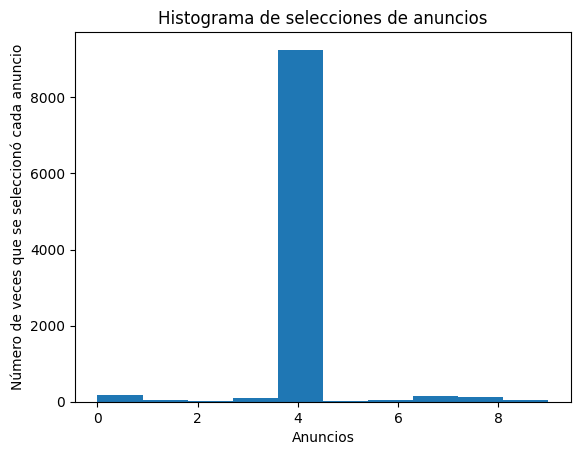

In [30]:
import matplotlib.pyplot as plt

plt.hist(ads_selected)  # Crear el histograma de las selecciones de anuncios
plt.title('Histograma de selecciones de anuncios')  # Título del gráfico
plt.xlabel('Anuncios')  # Etiqueta en el eje X
plt.ylabel('Número de veces que se seleccionó cada anuncio')  # Etiqueta en el eje Y
plt.show()  # Mostrar el gráfico